In [1]:
# importacao de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# AULA 02 e 03 - TRATAMENTO DE DADOS

# TRATAMENTO DE DADOS

Método concat() : usado para unir datagrames em abaixo do outro 
1. Passar uma lista de DataFrames para a função.
2. Ordem da lista, será a mesmo usada para montar o DataFrame resultado.

## Concatenação, Mesclagem e Junção de Dados

##### No pandas, temos três principais métodos para combinar ou unir DataFrames: concat, merge e join. 
##### Cada um deles serve a propósitos diferentes e é importante entender as diferenças para utilizá-los de forma eficaz.

### TRATAMENTO DE DADOS - CONCATENAR
#### Concatenar objetos pandas (DataFrames ou Series) ao longo de um eixo (linhas ou colunas).
##### Características:
##### - Não leva em consideração chaves ou indicies para combinar
##### - Útil quando os DataFrames têm o mesmo conjunto de colunas ou índices.

In [7]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

In [8]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

In [9]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [10]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [11]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [12]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


* Concatenação vertical (método concat).
Une os registros, um abaixo do outro.

In [14]:
pd.concat([df2, df1, df3], axis=0)

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
8,A8,B8,C8,D8
9,A9,B9,C9,D9


* O método concat() também pode unir dados na horizontal. 
* Para isso, os índices dos DFs devem ser os mesmos e o parâmetro axis=1.

In [16]:
df4 = pd.DataFrame({'E': ['E0', 'E1', 'E2', 'E3'],
                    'F': ['F0', 'F1', 'F2', 'F3'],
                    'G': ['G0', 'G1', 'G2', 'G3'],
                    'H': ['H0', 'H1', 'H2', 'H3']},
                   index=[0, 1, 2, 3])
df4

,E,F,G,H
0,E0,F0,G0,H0
1,E1,F1,G1,H1
2,E2,F2,G2,H2
3,E3,F3,G3,H3


In [17]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E0,F0,G0,H0
1,A1,B1,C1,D1,E1,F1,G1,H1
2,A2,B2,C2,D2,E2,F2,G2,H2
3,A3,B3,C3,D3,E3,F3,G3,H3


### TRATAMENTO DE DADOS - MESCLAR
##### O método merge() é semelhante à SQL, mescla com base em uma chave de um ou mais campos.
##### Especifica o tipo de mescla (parâmetro how). Por padrão how=inner, mas pode ser outer, left ou right.
##### - inner à retorna os registros em comum da chave.
##### - outer à retorna todos, informando nulo para os registros que não houver correspondência na chave.
##### - left, right à retorna todos de um dos lados, mesmo não havendo correspondência no lado oposto. Quando não há correspondência no lado oposto, preenche com nulo
##### Características:
##### - Permite especificar colunas-chave para a junção.
##### - Mais flexível e poderoso para combinações complexas.
##### - Pode combinar DataFrames com colunas-chave diferentes usando os parâmetros left_on e right_on.

In [19]:
esquerda = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                         'key2': ['K0', 'K1', 'K0', 'K1'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})

In [20]:
direita = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [21]:
esquerda.head()

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [22]:
direita.head()

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


### Merge (inner)
* Por padrão o método merge aplica how=inner

In [24]:
pd.merge(esquerda, direita, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Merge (outer)

In [26]:
pd.merge(esquerda, direita, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


#### Merge (left)

In [28]:
pd.merge(esquerda, direita, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


#### Merge (right)

In [30]:
pd.merge(esquerda, direita, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


#### Merge datasets noc_region e dataset_olympics_path

In [32]:
#importando CSV
# Caminho dos arquivos (ajuste conforme necessário)
noc_region_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/noc_region.csv'
dataset_olympics_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/dataset_olympics.csv'

# Importando os datasets
noc_region_df = pd.read_csv(noc_region_path, sep=',')
dataset_olympics_df = pd.read_csv(dataset_olympics_path)

df = dataset_olympics_df
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [33]:
noc_region_df.head(3)

,noc_region,reg,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [34]:
df = pd.merge(dataset_olympics_df, noc_region_df, how='left', left_on = 'NOC', right_on = 'noc_region')
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,noc_region,reg,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CHN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CHN,China,NaN


In [35]:
#dropando colunas
df.drop(['noc_region'], axis=1, inplace=True, errors='raise')
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


### TRATAMENTO DE DADOS - JUNTAR
#### O método join() é também originado da sintaxe SQL ANSI.
#### - Idem ao merge(), especifica o tipo de mescla (parâmetro how). 
#### - Por padrão how=left, mas pode ser outer, left ou right.

##### Características:
##### - Método chamado diretamente em um DataFrame.
##### - Por padrão, une pelo índice, mas pode especificar colunas-chave com o parâmetro on.
##### - Menos flexível que merge para combinações complexas.

In [37]:
esquerda = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                         'B': ['B0', 'B1', 'B2']},
                        index=['K0', 'K1', 'K2'])
esquerda.head(3)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [38]:
direita = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                        'D': ['D0', 'D2', 'D3']},
                       index=['K0', 'K2', 'K3'])

In [39]:
direita.head(3)

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [40]:
esquerda.join(direita)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [41]:
esquerda.join(direita, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [42]:
esquerda.join(direita, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### TRATAMENTO DE DADOS - TRATAR DADOS AUSENTES
#### Valores ausentes podem “atrapalhar” os de trabalhos de ciência de dados.
#### - Algumas técnicas de machine learning podem não tratar essas ausências automaticamente. Assim, cabe ao cientista ao cientista tratar as ausências de antemão.
### - Mesmo que a técnica saiba trabalhar com a ausência, o resultado pode ser prejudicado.

#### Algumas opções para trabalhar com valores ausentes...
#### –Excluir registros que possuem valores ausentes
#### –Substituir os valores ausentes por uma constante
#### –Substituir os valores ausentes por uma variável

In [45]:
# CRIA SÉRIE DE DADOS
s = {'COL_1':[212, 434,np.nan,44,np.nan],
     'COL_2':[43, np.nan,np.nan, np.nan, np.nan],
     'COL_3':[555, 603, 102, 77, 809], 
     'COL_4':[567, 560, 614, 88, 128],
     'COL_5':[555, 603, 102, 64, np.nan]}

In [46]:
# TRANSPÕE PARA PANDAS
df = pd.DataFrame(s)

In [47]:
df.head(10)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
2,NaN,NaN,102,614,102.0
3,44.0,NaN,77,88,64.0
4,NaN,NaN,809,128,NaN


In [48]:
# EXCLUINDO LINHAS
df.dropna(axis=0)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0


In [49]:
# EXCLUINDO COLUNAS
df.dropna(axis=1)

,COL_3,COL_4
0,555,567
1,603,560
2,102,614
3,77,88
4,809,128


In [50]:
# MANTENDO NO DF APENAS REGISTROS QUE POSSUEM PELO MENOS 4 VALORES NÃO AUSENTES
df.dropna(axis = 0, thresh=4)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
3,44.0,NaN,77,88,64.0


In [51]:
# SUBSTITUINDO OS AUSENTES POR 0
df.fillna(value=0)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,0.0,603,560,603.0
2,0.0,0.0,102,614,102.0
3,44.0,0.0,77,88,64.0
4,0.0,0.0,809,128,0.0


In [52]:
# SUBSTITUINDO OS AUSENTES POR UMA STRING
df.fillna(value='Valor ausente')

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,Valor ausente,603,560,603.0
2,Valor ausente,Valor ausente,102,614,102.0
3,44.0,Valor ausente,77,88,64.0
4,Valor ausente,Valor ausente,809,128,Valor ausente


In [53]:
# SUBSTITUINDO OS AUSENTES PELO VALOR MÉDIO DA COLUNA
df['COL_1'] = df['COL_1'].fillna(value = df['COL_1'].mean())
df.head(10)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
2,230.0,NaN,102,614,102.0
3,44.0,NaN,77,88,64.0
4,230.0,NaN,809,128,NaN


In [54]:
# instalando biblioteca para visualizar dados ausentes
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


#### Carregando dados olympics

In [56]:
#importando CSV
# Caminho dos arquivos (ajuste conforme necessário)
noc_region_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/noc_region.csv'
dataset_olympics_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/dataset_olympics.csv'

# Importando os datasets
noc_region_df = pd.read_csv(noc_region_path, sep=',')
dataset_olympics_df = pd.read_csv(dataset_olympics_path)

df = dataset_olympics_df
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [57]:
# Mostrar a quantidade de valores ausentes por coluna
# df.isnull(): Retorna um DataFrame do mesmo tamanho, com valores True onde os dados estão ausentes (NaN), e False onde estão presentes.
# sum(): Quando aplicado a um DataFrame de valores booleanos, ele soma True como 1 e False como 0, resultando no número de valores ausentes por coluna.
missing_values = df.isnull().sum()
print("Quantidade de valores ausentes por coluna:")
print(missing_values)

Quantidade de valores ausentes por coluna:
ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64


<Axes: >

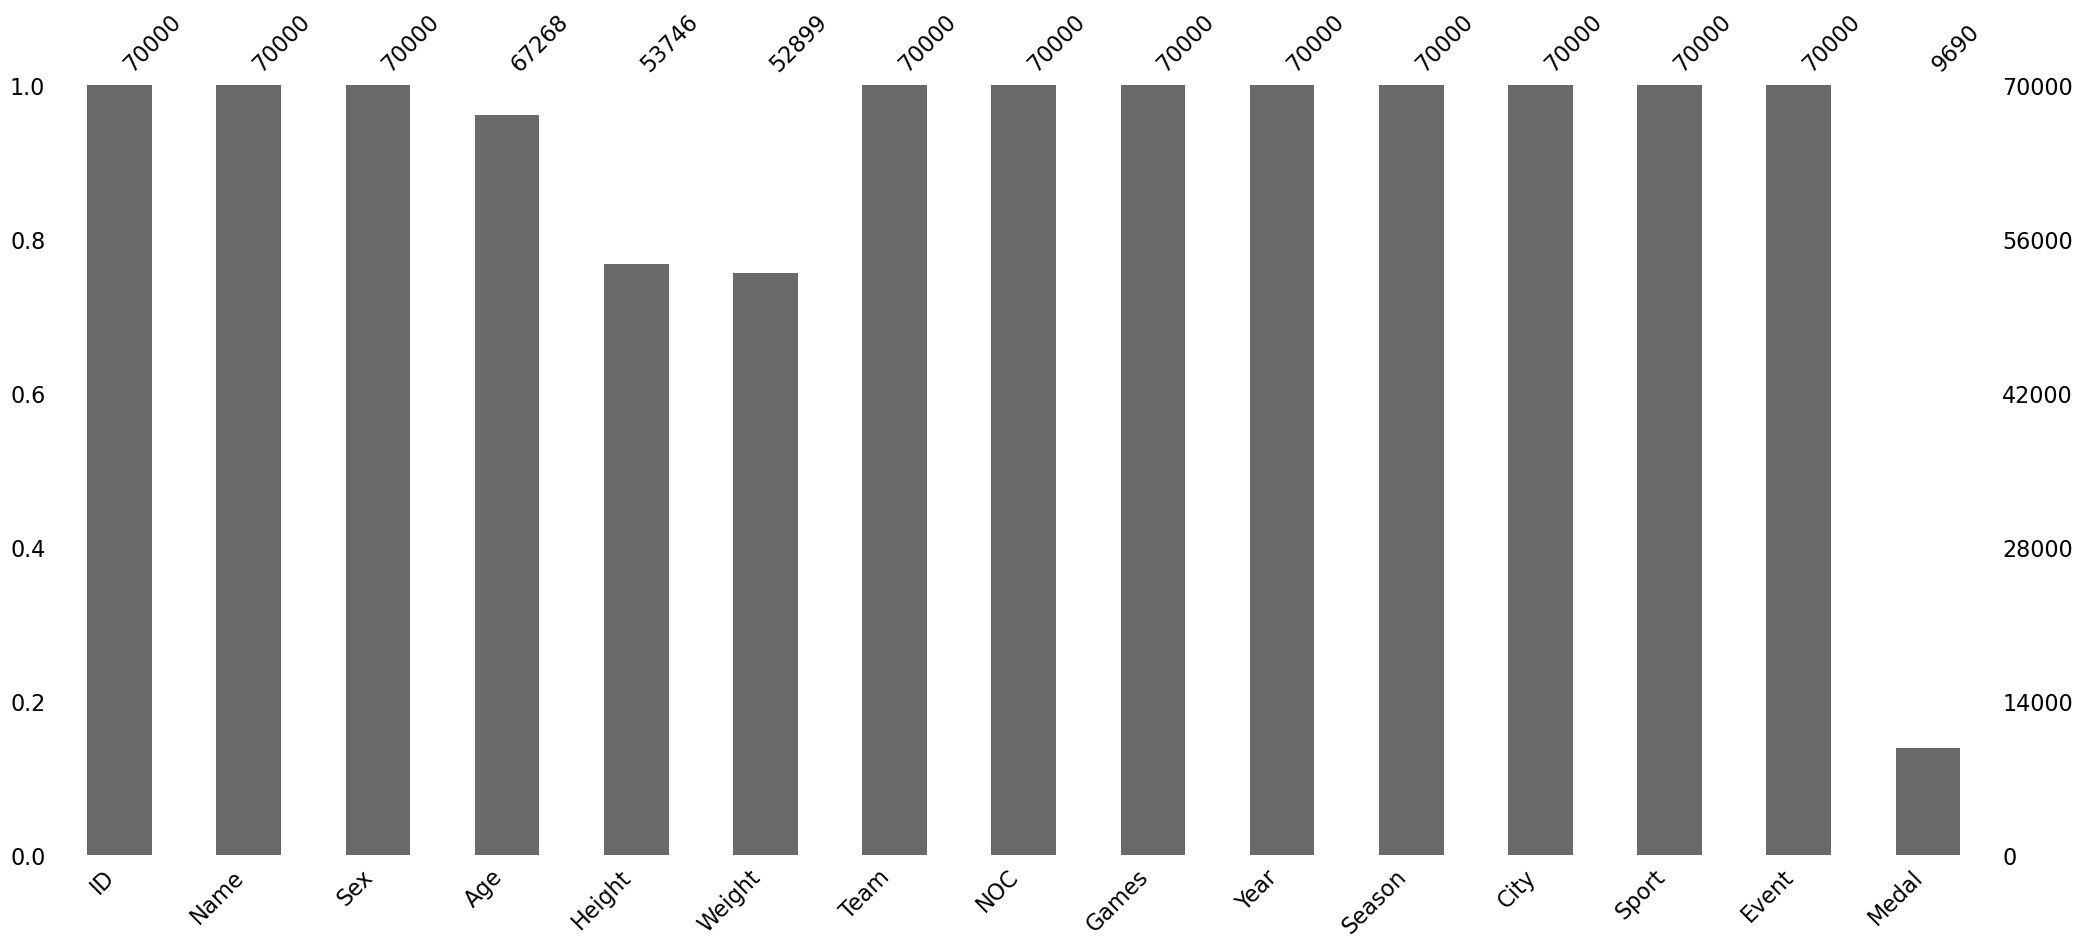

In [58]:
# Exibe o gráfico de barras para visualizar a quantidade de valores ausentes
msno.bar(df)

<Axes: >

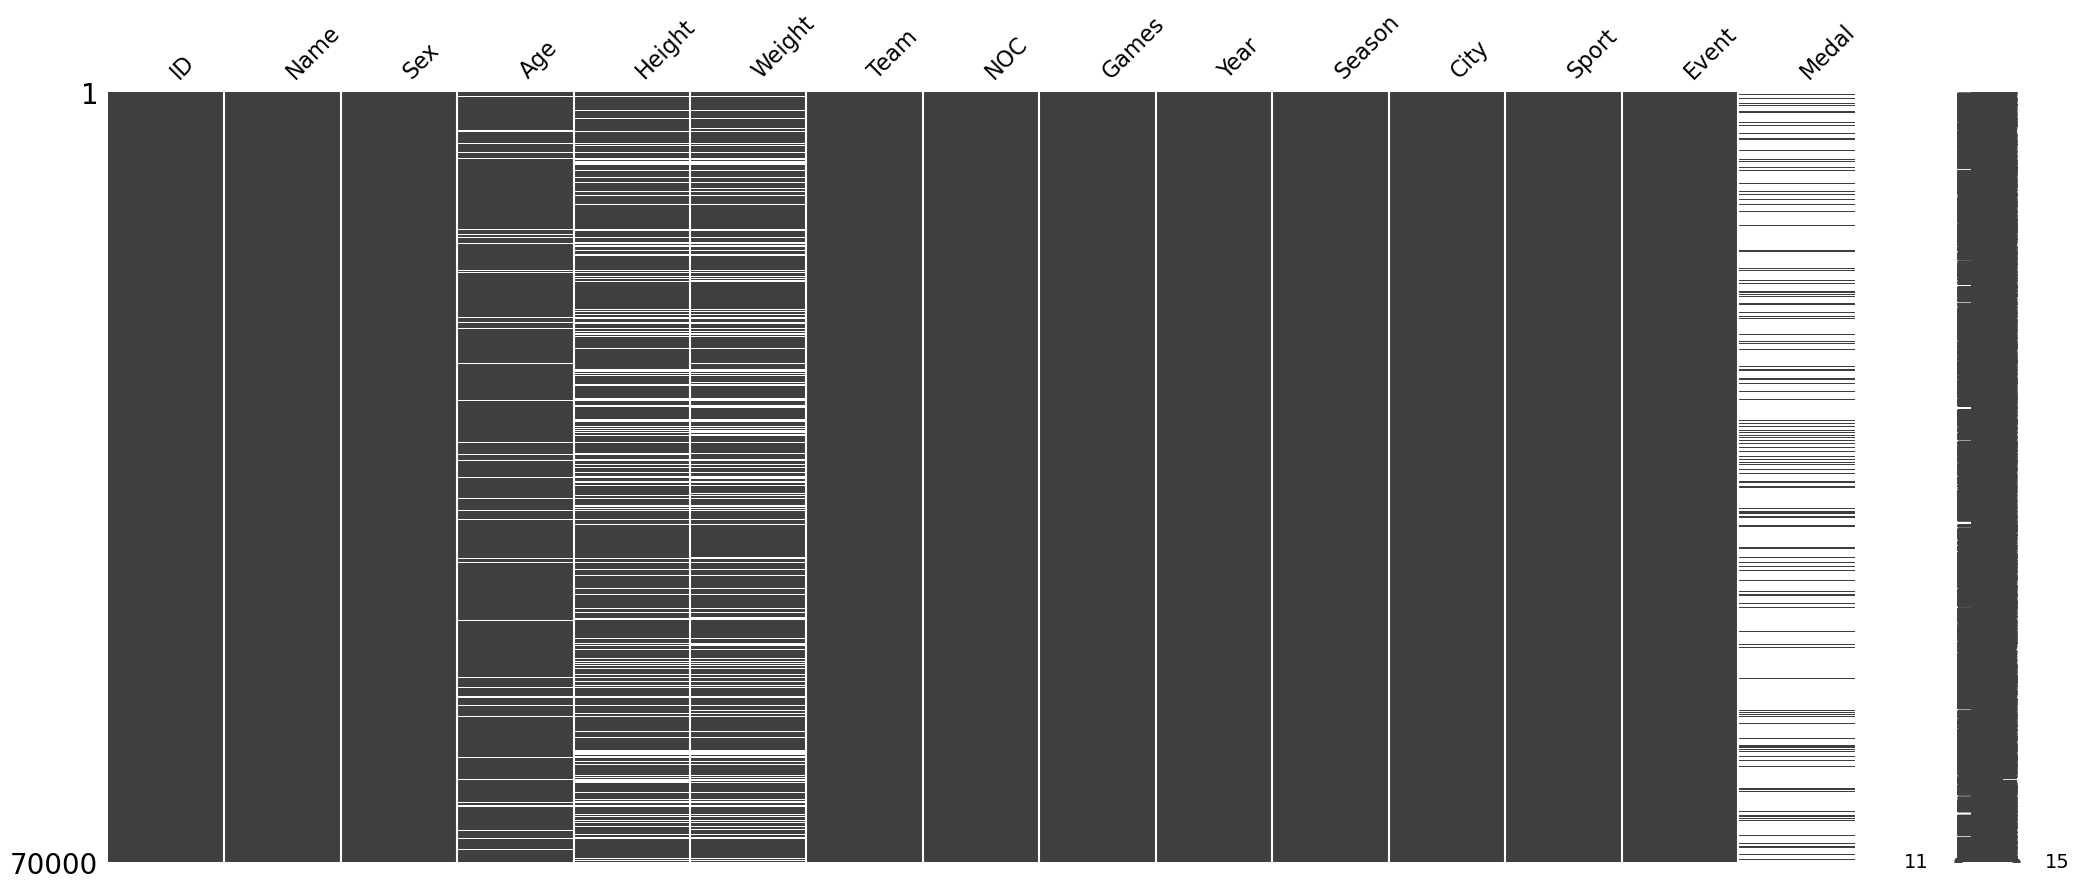

In [59]:
# Exibe o gráfico de matriz para observar o padrão dos valores ausentes
msno.matrix(df)

#### Tratando valores ausente, usando a média dos valores

In [61]:
df['Height'] = df['Height'].fillna(value = df['Height'].median())
df['Weight'] = df['Weight'].fillna(value = df['Weight'].median())
df['Age'] = df['Age'].fillna(value = df['Age'].median())
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### TRATAMENTO DE DADOS - TRATAMENTO DE OUTLIERS

##### adicionando outliers ao dataset

In [64]:
#importando CSV
# Caminho dos arquivos (ajuste conforme necessário)
noc_region_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/noc_region.csv'
dataset_olympics_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/dataset_olympics.csv'

# Importando os datasets
noc_region_df = pd.read_csv(noc_region_path, sep=',')
dataset_olympics_df = pd.read_csv(dataset_olympics_path)

df = dataset_olympics_df
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [65]:
# ADICIONANDO OUTLIERS
# Function to add random extreme outliers (both high and low) to a specific column
def add_random_extreme_outliers(df, column, percentage):
    num_outliers = int(len(df) * percentage / 100)  # Calculate number of outliers (10% of the data)
    indices = np.random.choice(df.index, num_outliers, replace=False)  # Randomly select rows for outliers
    
    # Split outliers: first half for large random outliers, second half for small random outliers
    half = num_outliers // 2
    
    # Create large random outliers (random values between 5 and 20 times the column mean)
    df.loc[indices[:half], column] = df[column].mean() * np.random.uniform(5, 20, size=half)
    
    # Create small random outliers (random values between 1/20 and 1/5 of the column mean)
    df.loc[indices[half:], column] = df[column].mean() * np.random.uniform(0.05, 0.2, size=num_outliers - half)

# Add random outliers to approximately 10% of the data for both 'Height' and 'Weight'
add_random_extreme_outliers(df, 'Height', 0.1)
add_random_extreme_outliers(df, 'Weight', 0.1)

In [66]:
df[['Weight','Height']].describe()

,Weight,Height
count,52927.000000,53759.000000
mean,71.364006,176.727263
std,25.487872,55.910222
min,3.822071,9.391677
25%,61.000000,168.000000
50%,70.000000,175.000000
75%,79.000000,183.000000
max,1407.768848,3497.729203


#### tratando outliers

In [68]:
df[['Weight','Height']].mean()

Weight     71.364006
Height    176.727263
dtype: float64

In [69]:
# EXTREMIDADE SUPERIOR DO PESO
df.sort_values(by=['Weight'],ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
14559,7841,Paolo Barelli,M,18.0,184.0,1407.768848,Italy,ITA,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
53282,27352,Arrigo Delladio,M,23.0,NaN,1373.071731,Italy,ITA,1952 Winter,1952,Winter,Oslo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
65634,33583,Natig Eyvazov,M,29.0,165.0,1346.619886,Azerbaijan,AZE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Bantamweight, Greco-Roman",NaN


In [70]:
# EXTREMIDADE INFERIOR DO PESO
df.sort_values(by=['Weight'],ascending=True).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
43918,22638,"John Joseph ""Jack"" Condon",M,20.0,NaN,3.822071,South Africa,RSA,1924 Summer,1924,Summer,Paris,Tennis,Tennis Men's Doubles,NaN
12854,6986,Lars Ytting Bak,M,32.0,190.0,4.031897,Denmark,DEN,2012 Summer,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,NaN
21309,11245,Alvaro Bianchi,M,31.0,NaN,4.066233,Italy,ITA,1956 Summer,1956,Summer,Melbourne,Rowing,Rowing Men's Coxless Pairs,NaN


In [71]:
df[['Weight','Height']].describe()

,Weight,Height
count,52927.000000,53759.000000
mean,71.364006,176.727263
std,25.487872,55.910222
min,3.822071,9.391677
25%,61.000000,168.000000
50%,70.000000,175.000000
75%,79.000000,183.000000
max,1407.768848,3497.729203


#### Alternativa 01:
#### Removendo extremidades dos dados usando quantile()
#### OBS.: reexecute as celulas de importação dos dados e adição de outlier

In [73]:
df[['Weight','Height']].describe()

,Weight,Height
count,52927.000000,53759.000000
mean,71.364006,176.727263
std,25.487872,55.910222
min,3.822071,9.391677
25%,61.000000,168.000000
50%,70.000000,175.000000
75%,79.000000,183.000000
max,1407.768848,3497.729203


In [74]:
# REMOVENDO EXTREMIDADES DOS PESOS
df = df[
    (df['Weight'] > df['Weight'].quantile(0.005)) &
    (df['Weight'] < df['Weight'].quantile(0.995))]

In [75]:
# REMOVENDO EXTREMIDADES DOS ALTURAS
df = df[
    (df['Height'] > df['Height'].quantile(0.005)) &
    (df['Height'] < df['Height'].quantile(0.995))]

In [76]:
df[['Weight','Height']].describe()

,Weight,Height
count,51352.000000,51352.000000
mean,70.675728,175.583872
std,13.056379,9.761885
min,41.000000,151.000000
25%,61.000000,169.000000
50%,70.000000,175.000000
75%,79.000000,183.000000
max,124.000000,202.000000


In [77]:
# DADOS PÓS REMOÇÕES
print('QTD DE REGISTROS',df['Weight'].count())
print('PESO MÉDIO',df['Weight'].mean())

QTD DE REGISTROS 51352
PESO MÉDIO 70.67572830658982


In [78]:
# DADOS PÓS REMOÇÕES
print('QTD DE REGISTROS',df['Height'].count())
print('ALTURA MÉDIA',df['Height'].mean())

QTD DE REGISTROS 51352
ALTURA MÉDIA 175.5838720984577


In [79]:
df[['Weight','Height']].describe()

,Weight,Height
count,51352.000000,51352.000000
mean,70.675728,175.583872
std,13.056379,9.761885
min,41.000000,151.000000
25%,61.000000,169.000000
50%,70.000000,175.000000
75%,79.000000,183.000000
max,124.000000,202.000000


#### Alternativa 02:
#### Substituindo valores extremos pelo valor médio dos não extremos

In [81]:
#RE importando CSV
# Caminho dos arquivos (ajuste conforme necessário)
noc_region_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/noc_region.csv'
dataset_olympics_path = 'C:/Users/mauri/OneDrive/VIZ_DATA/OlympicData/Dataset/dataset_olympics.csv'

# Importando os datasets
noc_region_df = pd.read_csv(noc_region_path, sep=',')
dataset_olympics_df = pd.read_csv(dataset_olympics_path)

df = dataset_olympics_df
df.head(3)

#aplicando outliers
# Add random outliers to approximately 10% of the data for both 'Height' and 'Weight'
add_random_extreme_outliers(df, 'Height', 0.1)
add_random_extreme_outliers(df, 'Weight', 0.1)

In [82]:
# SUBSTITUINDO EXTREMIDADE SUPERIOR DO PESO
df['Weight'] = np.where(df['Weight'] >= df['Weight'].quantile(0.995),

                                  df[(df['Weight'] > df['Weight'].quantile(0.005)) &
                                                (df['Weight'] < df['Weight'].quantile(0.995))]['Weight'].mean(),

                                  df['Weight'])

# SUBSTITUINDO EXTREMIDADE INFERIOR DO PESO
df['Weight'] = np.where(df['Weight'] <= df['Weight'].quantile(0.005),

                                  df[(df['Weight'] > df['Weight'].quantile(0.005)) &
                                                (df['Weight'] < df['Weight'].quantile(0.995))]['Weight'].mean(),

                                  df['Weight'])

In [83]:
# SUBSTITUINDO EXTREMIDADE SUPERIOR DO PESO
df['Height'] = np.where(df['Height'] >= df['Height'].quantile(0.995),

                                  df[(df['Height'] > df['Height'].quantile(0.005)) &
                                                (df['Height'] < df['Height'].quantile(0.995))]['Height'].mean(),

                                  df['Height'])

# SUBSTITUINDO EXTREMIDADE INFERIOR DO PESO
df['Height'] = np.where(df['Height'] <= df['Height'].quantile(0.005),

                                  df[(df['Height'] > df['Height'].quantile(0.005)) &
                                                (df['Height'] < df['Height'].quantile(0.995))]['Height'].mean(),

                                  df['Height'])

In [84]:
df[['Weight','Height']].describe()

,Weight,Height
count,52914.000000,53767.000000
mean,70.761670,175.493932
std,13.273197,9.815674
min,41.000000,149.000000
25%,61.000000,169.000000
50%,70.000000,175.000000
75%,79.000000,182.000000
max,124.000000,202.000000


In [85]:
# DADOS PÓS REMOÇÕES
print('QTD DE REGISTROS',df['Height'].count())
print('ALTURA MÉDIA',df['Height'].mean())

QTD DE REGISTROS 53767
ALTURA MÉDIA 175.49393181995603


### Discretização Não-supervisionada Por Divisão Igual
##### Essa técnica não trabalha bem com outliers, necessário tratar outliers antes

<Axes: xlabel='Weight', ylabel='Density'>

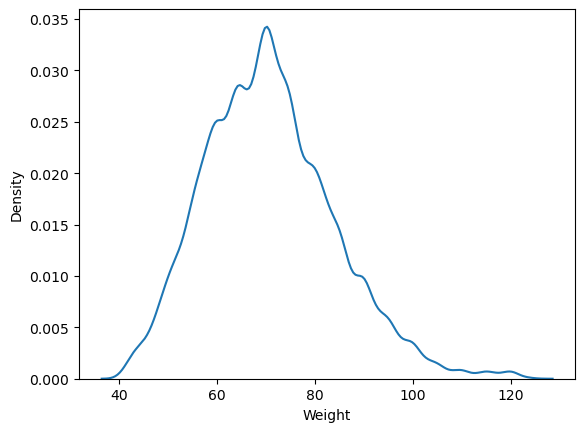

In [87]:
# VERIFICAR DISTRIBUIÇÕES DOS PESOS E ALTURAS
# UMA DISTRIBUIÇÃO RELATIVAMENTE SIMÉTRICA
sns.kdeplot(df['Weight'], legend=True)

<Axes: xlabel='Height', ylabel='Density'>

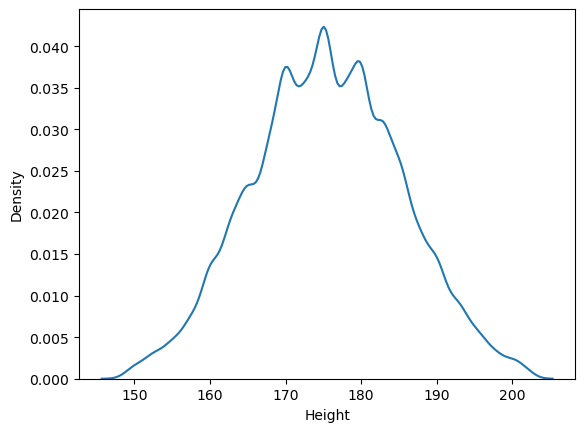

In [88]:
# VERIFICAR DISTRIBUIÇÕES DOS PESOS E ALTURAS
# UMA DISTRIBUIÇÃO RELATIVAMENTE SIMÉTRICA
sns.kdeplot(df['Height'], legend=True)

In [89]:
# PODEM SER CRIADAS FUNÇÕES PARA DISCRETIZAR

# Weight
def discrPeso(x):
    if x < df['Weight'].quantile(0.2):
        return 'MUITO_BAIXO'
    elif x < df['Weight'].quantile(0.4):
        return 'BAIXO'
    elif x < df['Weight'].quantile(0.6):
        return 'MÉDIO'
    elif x < df['Weight'].quantile(0.8):
        return 'ALTO'
    else:
        return 'MUITO_ALTO'

# ALTURA
def discrAltura(x):
    if x < df['Height'].quantile(0.2):
        return 'MUITO_BAIXO'
    elif x < df['Height'].quantile(0.4):
        return 'BAIXO'
    elif x < df['Height'].quantile(0.6):
        return 'MÉDIO'
    elif x < df['Height'].quantile(0.8):
        return 'ALTO'
    else:
        return 'MUITO_ALTO'

In [90]:
# APLCIANDO AS FUNÇÕES...
df['DESC_WEIGHT'] = df['Weight'].apply(discrPeso)
df['DESC_HEIGHT'] = df['Height'].apply(discrAltura)


KeyboardInterrupt



In [91]:
# CRIANDO UMA AMOSTRA DOS DADOS
df10 = df.sample(frac=0.1, random_state = 123).head()

In [93]:
# APLCIANDO AS FUNÇÕES...
df10['DESC_WEIGHT'] = df10['Weight'].apply(discrPeso)
df10['DESC_HEIGHT'] = df10['Height'].apply(discrAltura)

In [95]:
df10.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,DESC_WEIGHT,DESC_HEIGHT
21971,11582,Binard,M,NaN,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Cycling,Cycling Men's Sprint,NaN,MUITO_ALTO,MUITO_ALTO
16953,9085,Lucien Beaumont,M,21.0,NaN,NaN,Canada,CAN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 100 metres Freestyle,NaN,MUITO_ALTO,MUITO_ALTO
48447,24978,"Melvyn ""Mel"" Dalgleish",M,21.0,198.0,89.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,NaN,MUITO_ALTO,MUITO_ALTO


In [97]:
# PESOS E ALTURAS CATEGÓRICAS

### TRATAMENTO DE DADOS - BINARIZAÇÃO
#### A binarização geralmente se refere ao processo de transformar variáveis em valores binários (0 ou 1), especialmente no contexto de variáveis booleanas ou em classificações dicotômicas (com apenas duas categorias).

In [101]:
# Binarizando a coluna 'Gender'
df['Gender_Bin'] = df['Sex'].map({'M': 1, 'F': 0})
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Gender_Bin
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1


In [103]:
df['Gender_Bin'] = df['Gender_Bin'].astype(bool)

In [105]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Gender_Bin
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,True
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,True
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,True


### TRATAMENTO DE DADOS - CODIFICAÇÃO ONE-HOT
#### A codificação one-hot transforma variáveis categóricas em múltiplas colunas binárias. Para cada categoria em uma variável, ela cria uma nova coluna onde o valor é 1 se a amostra pertence àquela categoria, e 0 caso contrário.

In [108]:
colunas_discretas = ['Sport']  # Colunas que você quer binarizar

# Binarizando as colunas discretas
df_binarized = pd.get_dummies(df10, columns=colunas_discretas, drop_first=True)

In [110]:
df_binarized.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,DESC_WEIGHT,DESC_HEIGHT,Sport_Basketball,Sport_Cycling,Sport_Rhythmic Gymnastics,Sport_Swimming
21971,11582,Binard,M,NaN,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Cycling Men's Sprint,NaN,MUITO_ALTO,MUITO_ALTO,False,True,False,False
16953,9085,Lucien Beaumont,M,21.0,NaN,NaN,Canada,CAN,1952 Summer,1952,Summer,Helsinki,Swimming Men's 100 metres Freestyle,NaN,MUITO_ALTO,MUITO_ALTO,False,False,False,True
48447,24978,"Melvyn ""Mel"" Dalgleish",M,21.0,198.0,89.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Basketball Men's Basketball,NaN,MUITO_ALTO,MUITO_ALTO,True,False,False,False


### TRATAMENTO DE DADOS - EXPORTANDO DATSET
#### A codificação one-hot transforma variáveis 

In [113]:
df_binarized.to_csv('df_binarized.csv', sep=',', index=True, encoding='utf-8')